# Log Transformations - Lab

## Introduction

It's time to practice some logarithmic transformations on the Ames Housing dataset!

## Objectives

You will be able to:

- Determine if a log transformation would be useful for a specific model or set of data
- Apply log transformations to independent and dependent variables in linear regression
- Interpret the coefficients of variables that have been transformed using a log transformation

## Ames Housing Data

Below we load the numeric features from the Ames Housing dataset into a dataframe. We also drop any rows with missing data.

In [ ]:
# Run this cell without changes
import pandas as pd
ames = pd.read_csv("ames.csv", index_col=0)
ames = ames.select_dtypes("number")
ames.dropna(inplace=True)
ames

## Identify Good Candidates for Log Transformation

Below we plot each of the potential numeric features against `SalePrice`:

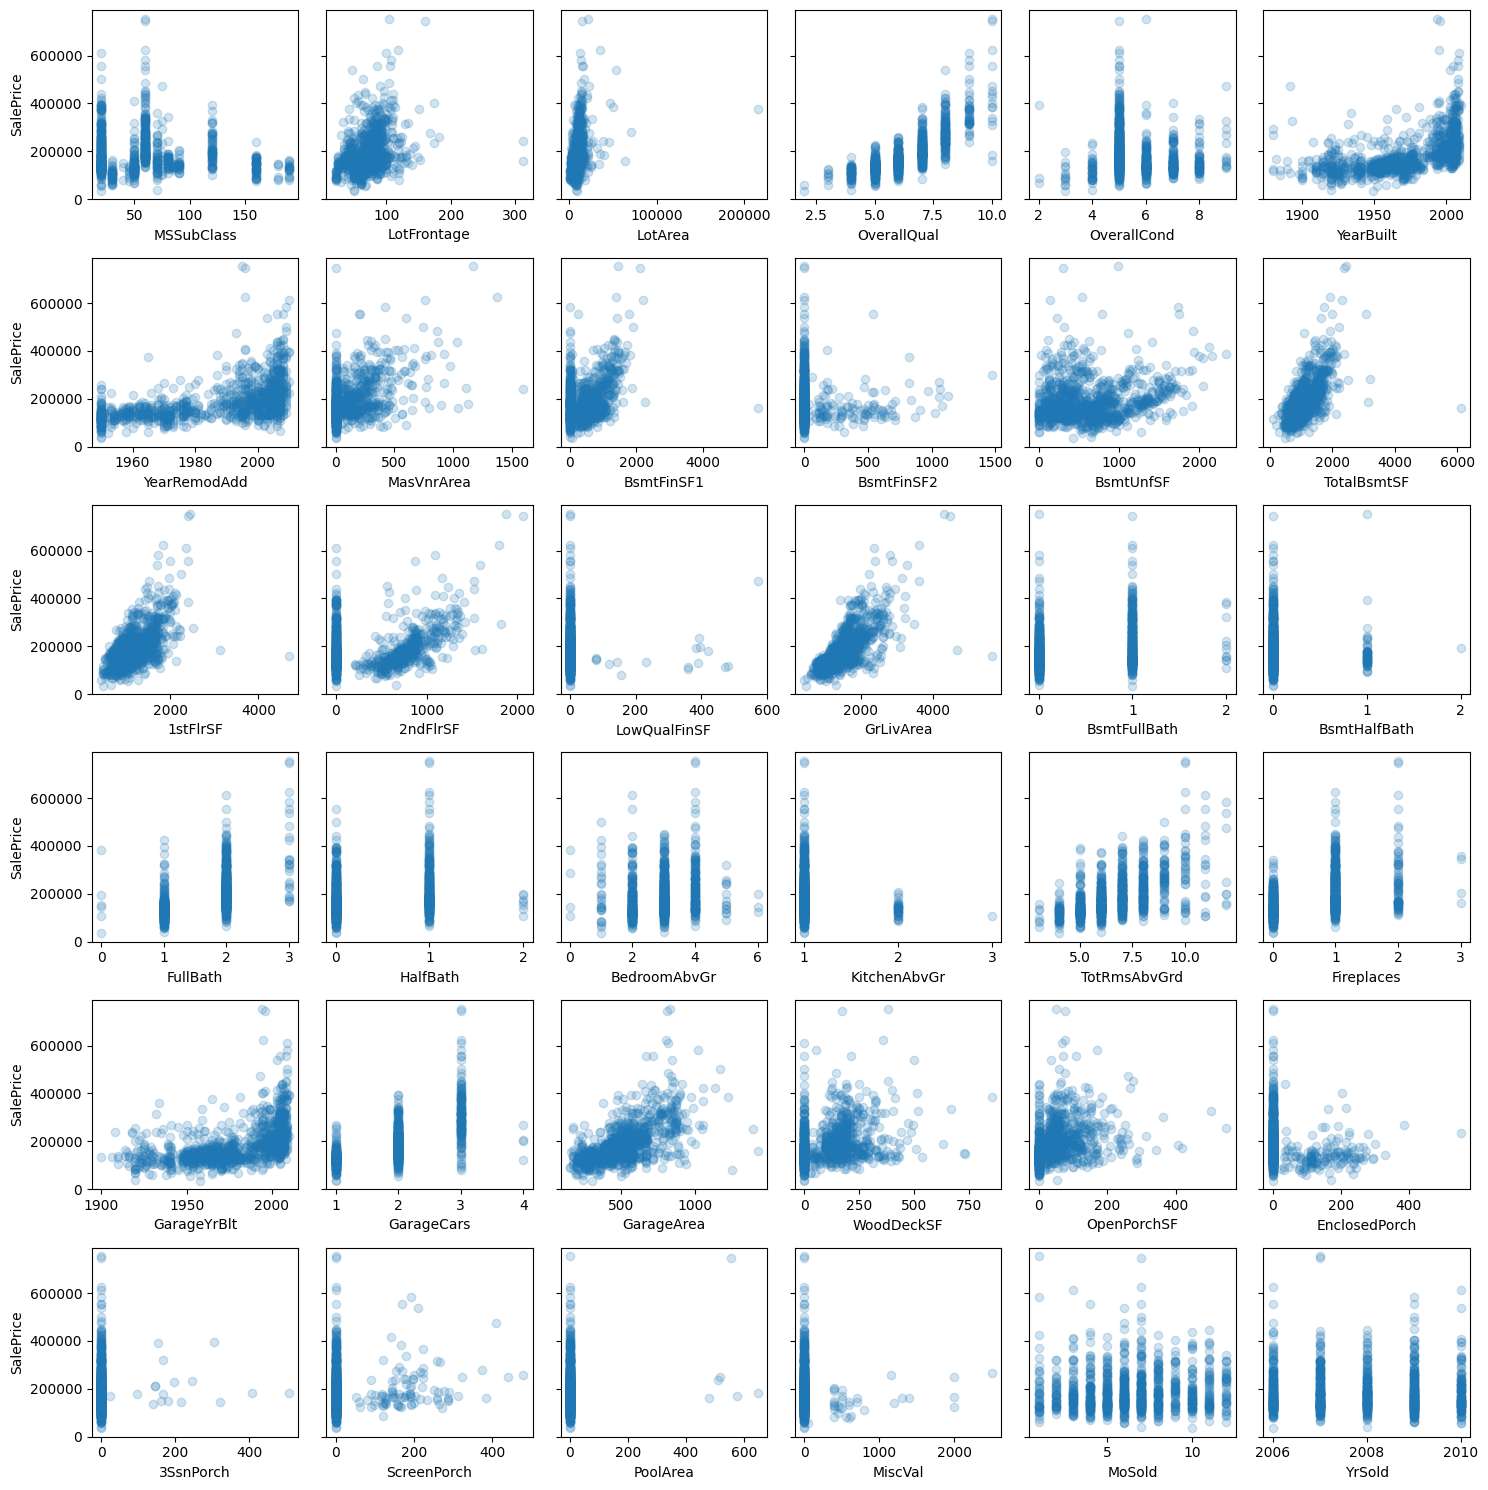

In [2]:
# Run this cell without changes
import matplotlib.pyplot as plt
import numpy as np

y = ames["SalePrice"]
X = ames.drop("SalePrice", axis=1)

fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(15,15), sharey=True)

for i, column in enumerate(X.columns):
    # Locate applicable axes
    row = i // 6
    col = i % 6
    ax = axes[row][col]
    
    # Plot feature vs. y and label axes
    ax.scatter(X[column], y, alpha=0.2)
    ax.set_xlabel(column)
    if col == 0:
        ax.set_ylabel("SalePrice")

fig.tight_layout()

Let's say we want to build a model with **at least one log-transformed feature** as well as a **log-transformed target**

Do you see any features that look like good candidates for this type of transformation?

For reference, a good candidate for this might look like any of these three graphs:

---

<div align="center"><div style="background-image: url('https://upload.wikimedia.org/wikipedia/commons/thumb/0/00/Population_vs_area.svg/256px-Population_vs_area.svg.png'); height: 200px; width: 256px;"></div><a title="Skbkekas, CC BY-SA 3.0 &lt;http://creativecommons.org/licenses/by-sa/3.0/&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Population_vs_area.svg">Skbkekas, CC BY-SA 3.0, via Wikimedia Commons</a></div>

---

<div align="center"><img src="http://sciences.usca.edu/biology/zelmer/305/trans/y.jpg" width="256"/>
<a href="http://sciences.usca.edu/biology/zelmer/305/trans/">Derek Zelmer, UCSA</a></div>

---

![e^x](https://curriculum-content.s3.amazonaws.com/data-science/images/log_graphs.png)

Try to find one feature that resembles each of these shapes.

Because this is real-world messy data, none of them are going to match perfectly, and that's ok!

In [ ]:
# Your written answer here


### Plot Log Transformed Versions of Features

For each feature that you identified as a good candidate for log transformation, plot the feature vs. `SalePrice` as well as the log transformed feature vs. log transformed `SalePrice`.

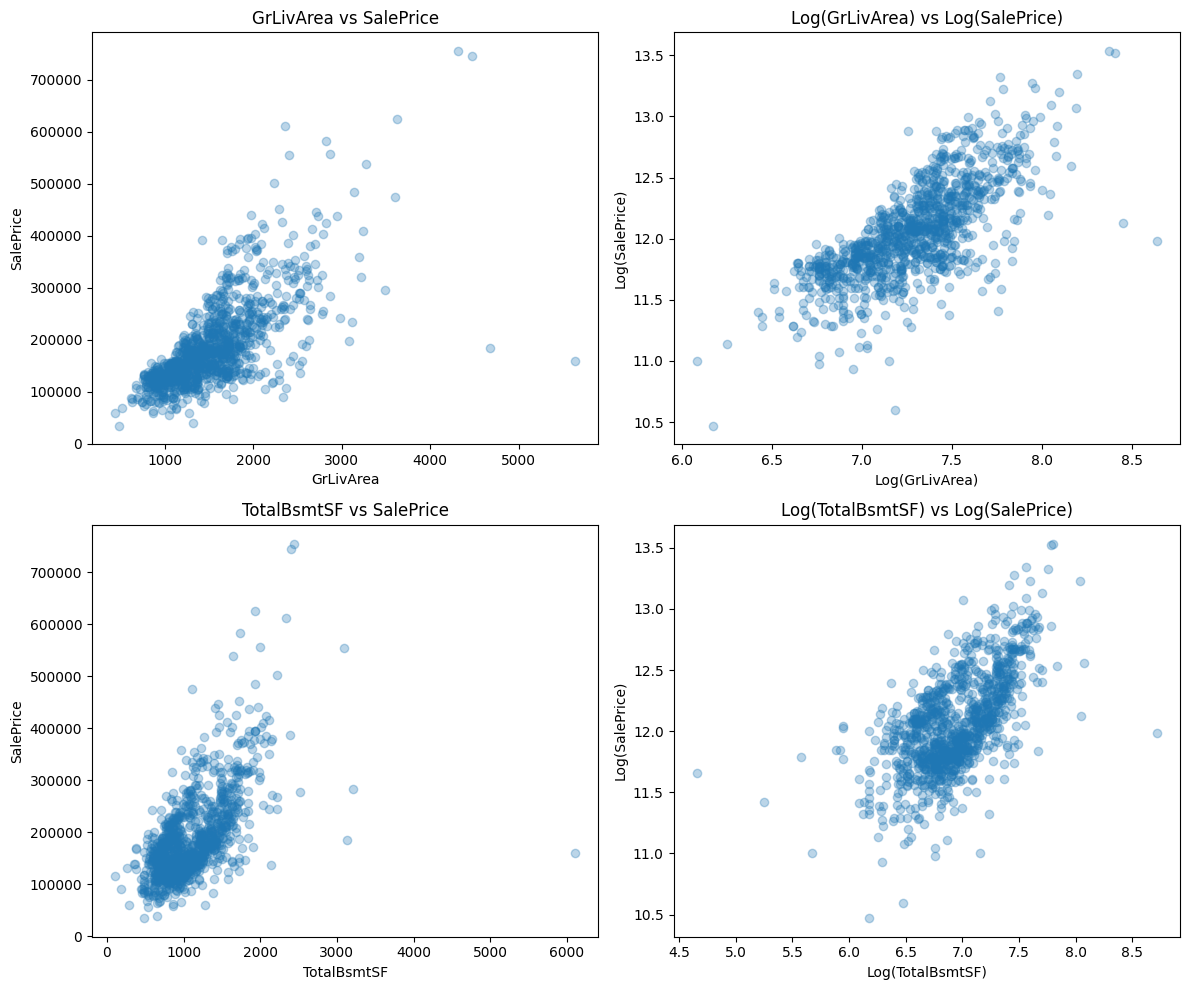

In [3]:
# Your code here
import pandas as pd

# Load and clean the data
ames = pd.read_csv("ames.csv", index_col=0)
ames = ames.select_dtypes("number")
ames.dropna(inplace=True)

# Avoid log(0) by replacing zeros in TotalBsmtSF with NaN
ames = ames[ames["TotalBsmtSF"] > 0]

# Create log-transformed columns
ames["Log_SalePrice"] = np.log(ames["SalePrice"])
ames["Log_GrLivArea"] = np.log(ames["GrLivArea"])
ames["Log_TotalBsmtSF"] = np.log(ames["TotalBsmtSF"])

# Set up the figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Plot GrLivArea vs SalePrice
axes[0, 0].scatter(ames["GrLivArea"], ames["SalePrice"], alpha=0.3)
axes[0, 0].set_title("GrLivArea vs SalePrice")
axes[0, 0].set_xlabel("GrLivArea")
axes[0, 0].set_ylabel("SalePrice")

# Plot Log(GrLivArea) vs Log(SalePrice)
axes[0, 1].scatter(ames["Log_GrLivArea"], ames["Log_SalePrice"], alpha=0.3)
axes[0, 1].set_title("Log(GrLivArea) vs Log(SalePrice)")
axes[0, 1].set_xlabel("Log(GrLivArea)")
axes[0, 1].set_ylabel("Log(SalePrice)")

# Plot TotalBsmtSF vs SalePrice
axes[1, 0].scatter(ames["TotalBsmtSF"], ames["SalePrice"], alpha=0.3)
axes[1, 0].set_title("TotalBsmtSF vs SalePrice")
axes[1, 0].set_xlabel("TotalBsmtSF")
axes[1, 0].set_ylabel("SalePrice")

# Plot Log(TotalBsmtSF) vs Log(SalePrice)
axes[1, 1].scatter(ames["Log_TotalBsmtSF"], ames["Log_SalePrice"], alpha=0.3)
axes[1, 1].set_title("Log(TotalBsmtSF) vs Log(SalePrice)")
axes[1, 1].set_xlabel("Log(TotalBsmtSF)")
axes[1, 1].set_ylabel("Log(SalePrice)")

# Adjust layout and show
plt.tight_layout()
plt.show()

Do the transformed relationships look more linear? If so, they should be included in the model.

## Build a Model with Log-Transformed Features and Target

### Data Preparation

Choose up to 3 of the features you investigated, and set up an X dataframe containing the log-transformed versions of these features as well as a y series containing the log-transformed version of the target.

---

<details>
    <summary style="cursor: pointer"><b>Hint (click to reveal)</b></summary>

If you are planning log transform a feature measured in _years_ (e.g. `YearRemodAdd`) consider shifting the data first. For example, you might subtract 1900 or 1910 from the year, so that a 1% increase in year is closer to meaning 1 year rather than 20 years.

</details>

In [4]:
# Your code here - prepare data for modeling
import numpy as np
import pandas as pd

# Load and clean the data
ames = pd.read_csv("ames.csv", index_col=0)
ames = ames.select_dtypes("number")
ames.dropna(inplace=True)

# Filter out rows where TotalBsmtSF is 0 (can't take log(0))
ames = ames[ames["TotalBsmtSF"] > 0]

# Apply log transformations
ames["Log_SalePrice"] = np.log(ames["SalePrice"])
ames["Log_GrLivArea"] = np.log(ames["GrLivArea"])
ames["Log_TotalBsmtSF"] = np.log(ames["TotalBsmtSF"])
ames["Log_YearRemodAdd"] = np.log(ames["YearRemodAdd"] - 1900)

# Define X and y
X = ames[["Log_GrLivArea", "Log_TotalBsmtSF", "Log_YearRemodAdd"]]
y = ames["Log_SalePrice"]

# Display first few rows to confirm
print(X.head())
print(y.head())

    Log_GrLivArea  Log_TotalBsmtSF  Log_YearRemodAdd
Id                                                  
1        7.444249         6.752270          4.634729
2        7.140453         7.140453          4.330733
3        7.487734         6.824374          4.624973
4        7.448334         6.628041          4.248495
5        7.695303         7.043160          4.605170
Id
1    12.247694
2    12.109011
3    12.317167
4    11.849398
5    12.429216
Name: Log_SalePrice, dtype: float64


### Modeling

Now build a StatsModels OLS model with a log-transformed target as well as log-transformed features.

In [5]:
# Your code here - build a model
import statsmodels.api as sm

# Add a constant to the model (intercept)
X_const = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X_const).fit()

# Print the summary of the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          Log_SalePrice   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     1099.
Date:                Wed, 30 Apr 2025   Prob (F-statistic):               0.00
Time:                        19:01:21   Log-Likelihood:                 226.53
No. Observations:                1097   AIC:                            -445.1
Df Residuals:                    1093   BIC:                            -425.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                3.1558      0.156  

### Model Evaluation and Interpretation

How did the model perform? How might we interpret its coefficients? Create as many cells as needed.

In [6]:
# Your code here - evaluate the model
print("R-squared: 0.751 - About 75.1% of the variation in log sale prices is explained by the model.")
print("Adjusted R-squared: 0.750 - Very close to R², indicating all features contribute meaningfully.")
print("F-statistic: 1099, p-value ≈ 0 - The model is highly statistically significant.")


print("Log_GrLivArea: 0.5925 → A 1% increase in GrLivArea is associated with a 0.59% increase in SalePrice.")
print("Log_TotalBsmtSF: 0.3427 → A 1% increase in TotalBsmtSF is associated with a 0.34% increase in SalePrice.")
print("Log_YearRemodAdd: 0.4999 → A 1% increase in YearRemodAdd (shifted) is associated with a 0.50% increase in SalePrice.")


print("Omnibus: 325.481, JB: 2091.227, p < 0.001 → Residuals are not normally distributed.")
print("Skew: -1.205 and Kurtosis: 9.32 → Residuals are left-skewed with heavy tails.")
print("Durbin-Watson: 2.037 → No major autocorrelation detected (good).")


print("The model has strong explanatory power and all predictors are statistically significant.")
print("However, residuals are not perfectly normal, suggesting potential outliers or missing variables.")

R-squared: 0.751 - About 75.1% of the variation in log sale prices is explained by the model.
Adjusted R-squared: 0.750 - Very close to R², indicating all features contribute meaningfully.
F-statistic: 1099, p-value ≈ 0 - The model is highly statistically significant.
Log_GrLivArea: 0.5925 → A 1% increase in GrLivArea is associated with a 0.59% increase in SalePrice.
Log_TotalBsmtSF: 0.3427 → A 1% increase in TotalBsmtSF is associated with a 0.34% increase in SalePrice.
Log_YearRemodAdd: 0.4999 → A 1% increase in YearRemodAdd (shifted) is associated with a 0.50% increase in SalePrice.
Omnibus: 325.481, JB: 2091.227, p < 0.001 → Residuals are not normally distributed.
Skew: -1.205 and Kurtosis: 9.32 → Residuals are left-skewed with heavy tails.
Durbin-Watson: 2.037 → No major autocorrelation detected (good).
The model has strong explanatory power and all predictors are statistically significant.
However, residuals are not perfectly normal, suggesting potential outliers or missing variab

## Summary

Now you have practiced modeling with log transformations! This is a subtle, messy process, so don't be discouraged if this was a tricky lab.